In [3]:
import math
import random

class MicroSOM:
    def __init__(self, nNeurons):
        self.neurons = []
        for i in range(nNeurons):
            self.neurons.append({"x": random.random(), "y": random.random()})
        #self.n1 = {"x": 0.3, "y": 0.7}
        #self.n2 = {"x": 0.7, "y": 0.1}
        #self.neurons = [self.n1, self.n2]
        #self.nNeurons = len(self.neurons)
        self.winner = -1

        if nNeurons == 2:
            self.lernRate = 0.8
            self.lernRateDecr = 0.9
            self.distRate = [1.0, 0.5]
            self.distRateDecr = [1.0, 0.8]
        else:
            self.lernRate = 0.5
            self.lernRateDecr = 0.99
            self.distRate = [1.0, 0.9, 0.75, 0.4, 0.1]
            self.distRateDecr = [1.0, 0.98, 0.98, 0.98, 0.98]


    def lernen(self, xR, yR):
        distances = [math.hypot(xR - n["x"], yR - n["y"]) for n in self.neurons]
        minDistance = min(distances)
        self.winner = distances.index(minDistance)

        for i, n in enumerate(self.neurons):
            neighbDistance = abs(i - self.winner)
            alpha = self.lernRate * self.distRate[neighbDistance]
            self.neurons[i]["x"] += (xR - self.neurons[i]["x"]) * alpha
            self.neurons[i]["y"] += (yR - self.neurons[i]["y"]) * alpha

        self.lernRate *= self.lernRateDecr
        self.distRate = [r * d for r, d in zip(self.distRate, self.distRateDecr)]


In [1]:
import plotly.graph_objects as go
import random
import math

def norm(a):
    rng = max(a) - min(a)
    minG = min(a) - rng / 10
    maxG = max(a) + rng / 10
    rng = maxG - minG
    #print(minG, maxG, rng)
    return [(v - minG) / rng for v in a]

class SOMexample():
    def __init__(self, nNeurons, weight1, weight2, type):
        self.weight1 = norm(weight1)
        self.weight2 = norm(weight2)
        self.nNeurons = nNeurons
        self.som = MicroSOM(self.nNeurons)
        self.actReiz = None

    def neuer_reiz(self, mitPlot=False):
        self.actReiz = random.randint(0, len(self.weight1)-1)
        #print(self.actReiz)
        if mitPlot:
            self.plot()

    def lernen(self, mitPlot=False):
        self.som.lernen(self.weight1[self.actReiz], self.weight2[self.actReiz])
        if mitPlot:
            self.plot()

    def neu_lernen(self, mitPlot=False):
        self.neuer_reiz(False)
        self.lernen(False)
        if mitPlot:
            self.plot()

    def genPlot(self, traces):
        fig = go.Figure()
        for trace in traces:
            fig.add_trace(trace)
        
        fig.update_traces(textposition="bottom right")
        fig.update_xaxes(title_text='Gewicht', range=[0,1])
        fig.update_yaxes(title_text='Größe',
                         scaleanchor="x",
                         scaleratio=1,
                         range=[0,1])
        fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),
                          width=400, height=400)
        fig.show()


    def plot(self):
        traces = []
        traces.append(go.Scatter(x=[v for v, t in zip(self.weight1, type) if t == 0],
                                 y=[v for v, t in zip(self.weight2, type) if t == 0],
                                 text=[i for i, t in enumerate(type) if t == 0],
                                 showlegend=False,
                                 mode='markers+text',
                                 marker_color="red",
                                 marker_size=10
                                 ))
        traces.append(go.Scatter(x=[v for v, t in zip(self.weight1, type) if t == 1],
                                 y=[v for v, t in zip(self.weight2, type) if t == 1],
                                 text=[i for i, t in enumerate(type) if t == 1],
                                 showlegend=False,
                                 mode='markers+text',
                                 marker_color="blue",
                                 marker_size=10
                                 ))
        if self.actReiz != None:
            traces.append(go.Scatter(x=[self.weight1[self.actReiz]],
                                     y=[self.weight2[self.actReiz]],
                                     showlegend=False,
                                     mode='markers',
                                     marker_color="rgba(255, 182, 193, 0.0)",
                                     marker_line_width=2,
                                     marker_size=10
                                     ))
        traces.append(go.Scatter(x=[n["x"] for n in self.som.neurons], y=[n["y"] for n in self.som.neurons],
                                 showlegend=False,
                                 mode='lines+markers',
                                 marker=dict(color='grey', size=11),
                                 line=dict(color='black', width=2),
                                 marker_size=11
                                 ))
        if self.som.winner != -1:
            traces.append(go.Scatter(x=[self.som.neurons[self.som.winner]["x"]],
                                     y=[self.som.neurons[self.som.winner]["y"]],
                                     showlegend=False,
                                     mode='markers',
                                     marker_color="rgba(255, 182, 193, 0.0)",
                                     marker_line_width=2,
                                     marker_size=11
                                     ))

        self.genPlot(traces)

    def auswerten(self, mitPlot = False):
        nextNeuron = []
        distSum = 0
        for w1, w2 in zip(self.weight1, self.weight2):
            distances = [math.hypot(w1 - n["x"], w2 - n["y"]) for n in self.som.neurons]
            distMin = min(distances)
            nextNeuron.append(distances.index(distMin))
            distSum += distMin
        self.quantErr =  distSum / len(self.weight1)
        colors = ["red", "orange", "yellow",  "green", "blue"]
        traces = []
        traces.append(go.Scatter(x=self.weight1,
                                 y=self.weight2,
                                 marker={"color": [colors[neuron] for neuron in nextNeuron]},
                                 text=[i for i, t in enumerate(type)],
                                 showlegend=False,
                                 mode='markers+text',
                                 marker_size=10,
                            #     color_discrete_map={
                             #       0: "red",
                              #      1: "green",
                               #     2: "blue",
                                #    3: "goldenrod",
                                 #   4: "magenta"},
                                ))
        traces.append(go.Scatter(x=[n["x"] for n in self.som.neurons], y=[n["y"] for n in self.som.neurons],
                                 showlegend=False,
                                 mode='lines+markers',
                                 marker=dict(color= colors),
                                 line=dict(color='black', width=2),
                                 marker_size=14
                                ))    
        self.genPlot(traces)

            


In [1]:
w1, w2= 1,2
w1, w2

(1, 2)

In [4]:
bSize = [161, 158, 155, 175, 170, 186, 185, 195, 205, 193, 199]
bMass = [55, 53, 50, 50, 70, 88, 95, 100, 100, 110, 99]
type = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

somEx = SOMexample(2, bMass, bSize, type)

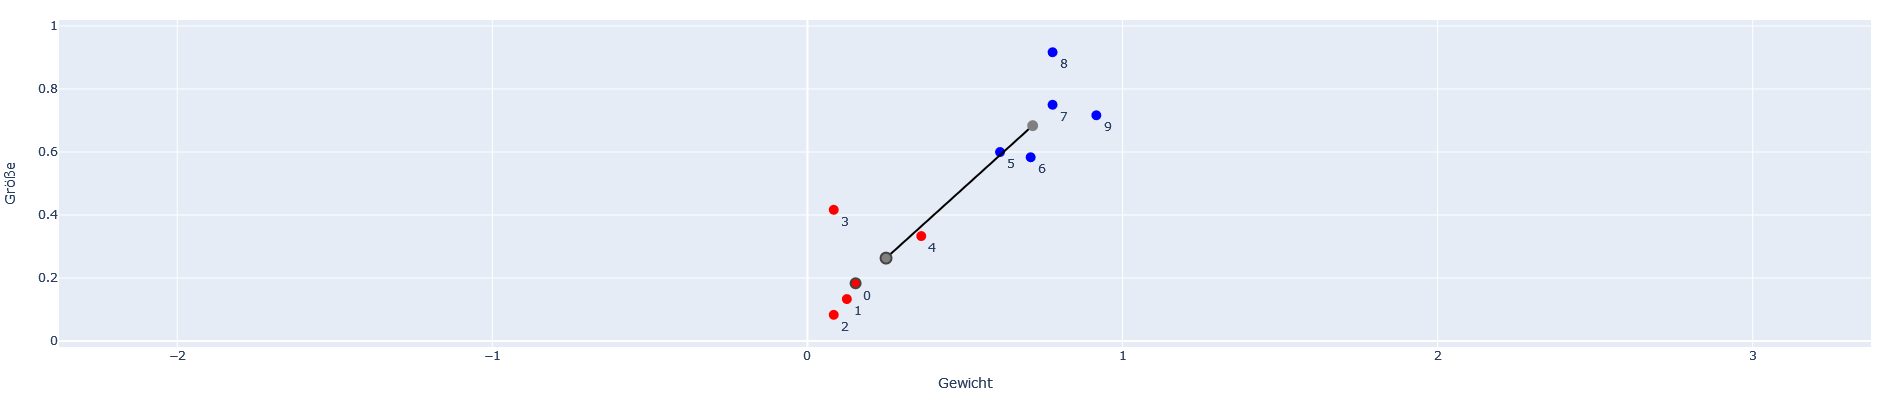

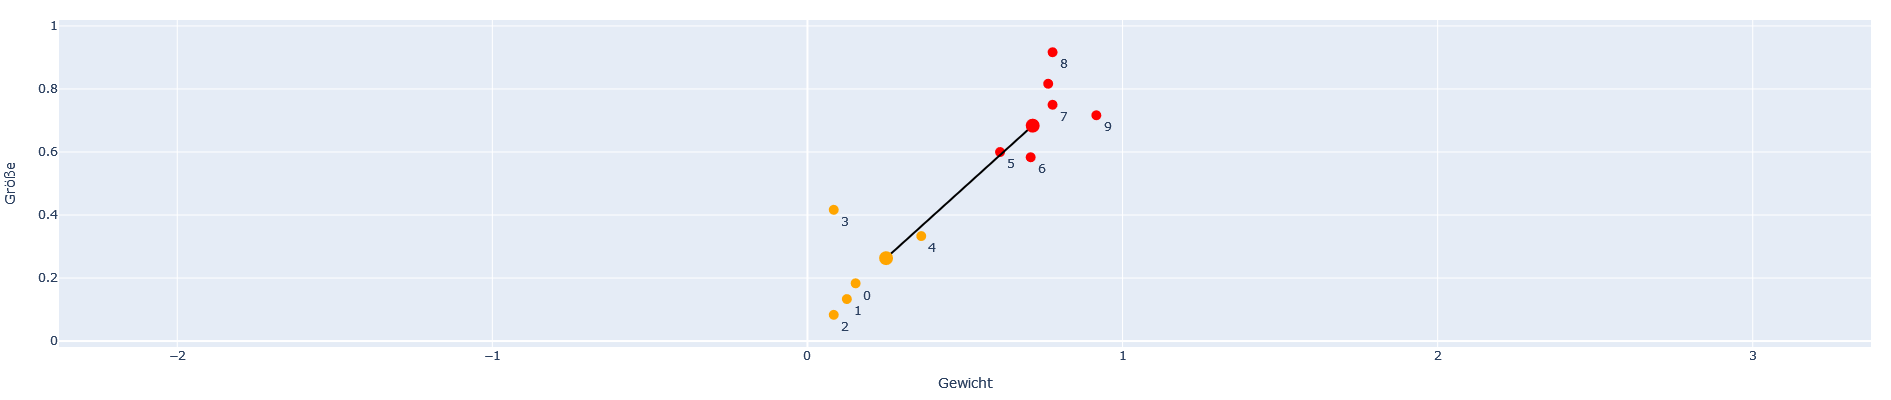

In [16]:
somEx.plot()
somEx.auswerten()

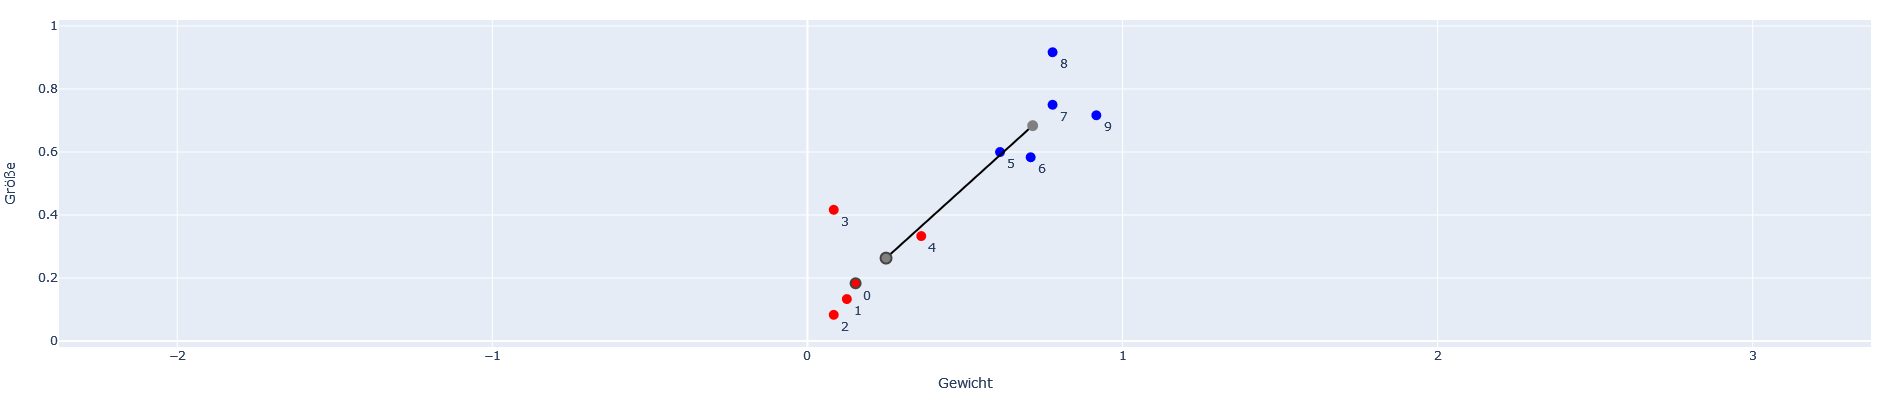

In [15]:
somEx.neu_lernen(mitPlot=True)

In [17]:
bSize = [161, 158, 155, 175, 170, 186, 185, 195, 205, 193, 199, 202, 188, 194, 189]
bMass = [55,   53,  50,  50,  70,  88,  95, 100, 100, 110,  99, 115,  95, 101,  91]
type = [  0,    0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1]

somEx2 = SOMexample(5, bMass, bSize, type)

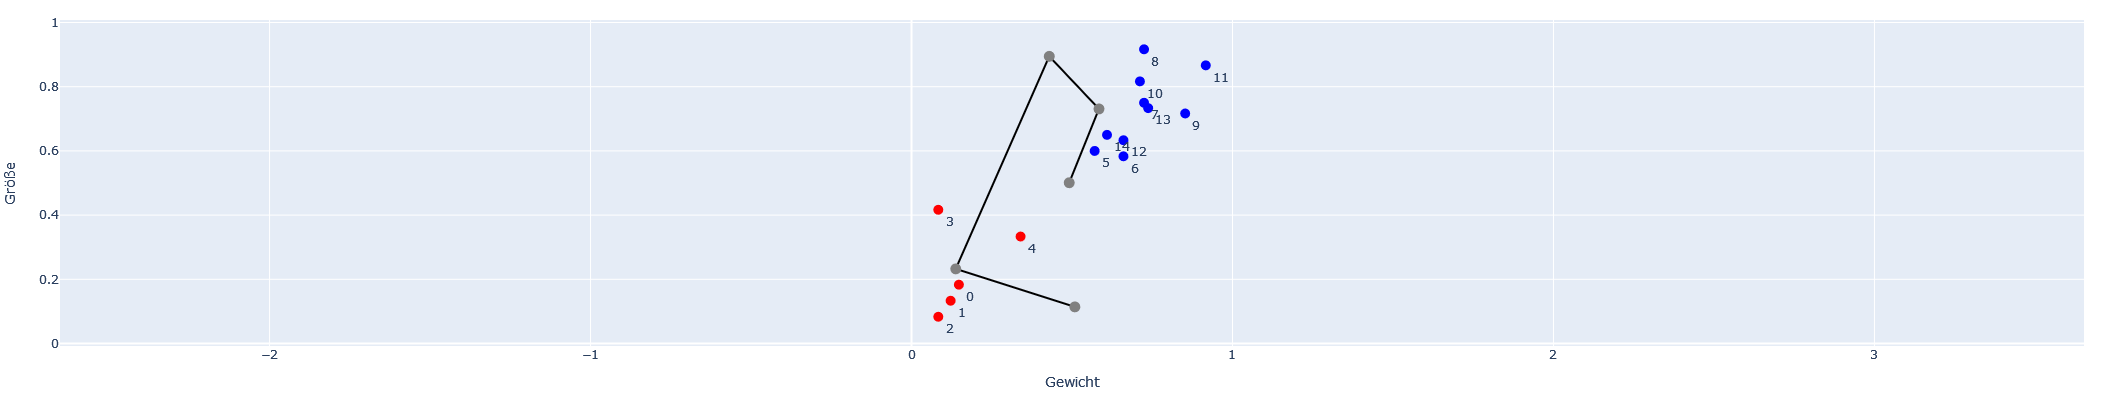

In [18]:
somEx2.plot()

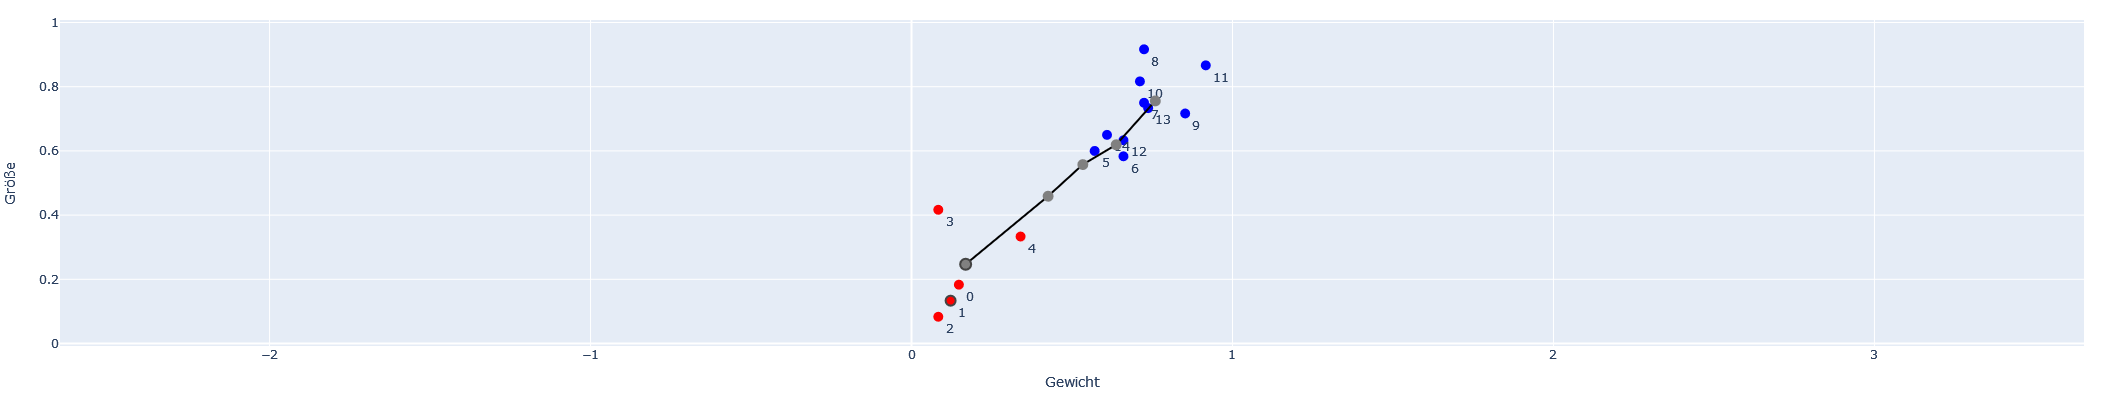

In [124]:
somEx2.neu_lernen(mitPlot=True)

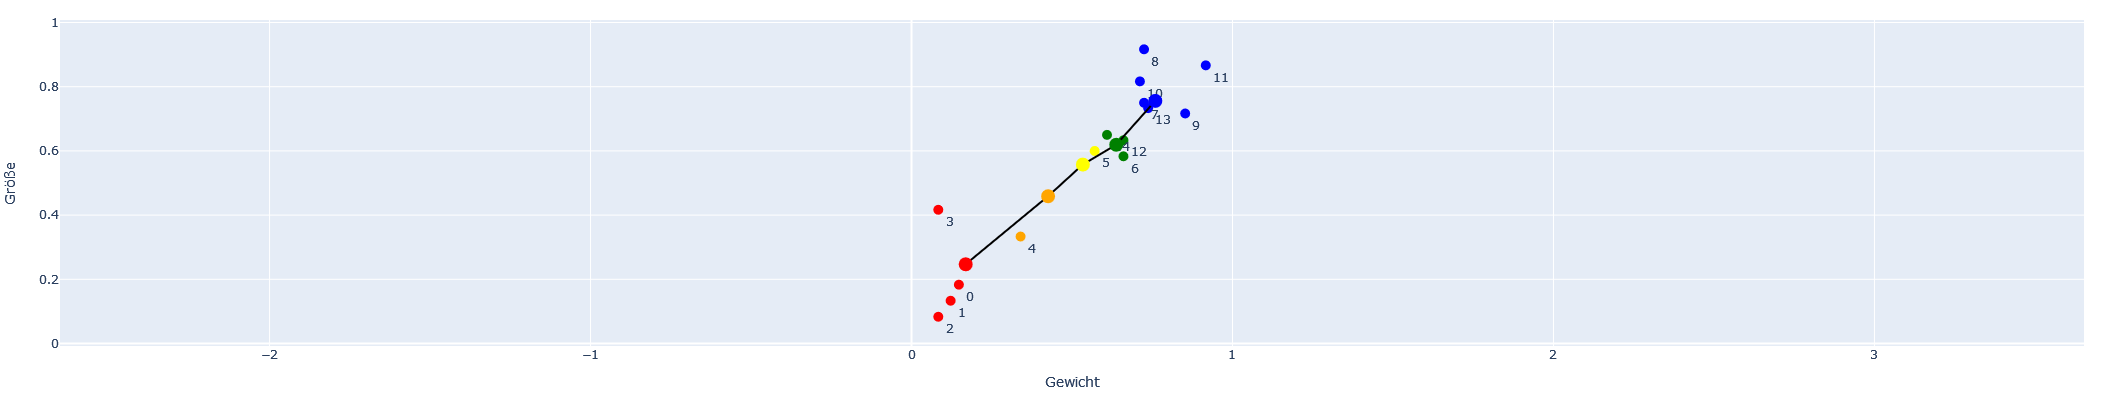

In [125]:
somEx2.auswerten()

In [27]:
somEx2.quantErr

0.3128997003519712